In [1]:
# (1)데이터 가져오기
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
diabetes=load_diabetes()
df_X=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y=pd.DataFrame(diabetes.target, columns=['target'])
print(df_X.shape)
print(df_y.shape)
# print(type(df_X))
# print(type(df_y))

(442, 10)
(442, 1)


In [50]:
# (2) 모델에 입력할 데이터 X 준비하기
X = df_X.values

In [51]:
# (3) 모델에 예측할 데이터 y 준비하기
Y = df_y['target'].values

In [52]:
# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [49]:
# (5) 모델 준비하기
W = np.random.rand(10)
b = np.random.rand()
# 모델함수
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [6]:
# (6) 손실함수 loss 정의하기
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [7]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [38]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.1

In [53]:
# (9) 모델 학습하기
losses = []

for i in range(1, 7001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 70 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 70 : Loss 5537.1654
Iteration 140 : Loss 5118.9442
Iteration 210 : Loss 4782.8534
Iteration 280 : Loss 4511.2006
Iteration 350 : Loss 4290.2255
Iteration 420 : Loss 4109.2166
Iteration 490 : Loss 3959.8279
Iteration 560 : Loss 3835.5485
Iteration 630 : Loss 3731.2922
Iteration 700 : Loss 3643.0795
Iteration 770 : Loss 3567.7906
Iteration 840 : Loss 3502.9743
Iteration 910 : Loss 3446.6999
Iteration 980 : Loss 3397.4420
Iteration 1050 : Loss 3353.9915
Iteration 1120 : Loss 3315.3859
Iteration 1190 : Loss 3280.8558
Iteration 1260 : Loss 3249.7831
Iteration 1330 : Loss 3221.6684
Iteration 1400 : Loss 3196.1058
Iteration 1470 : Loss 3172.7631
Iteration 1540 : Loss 3151.3666
Iteration 1610 : Loss 3131.6887
Iteration 1680 : Loss 3113.5392
Iteration 1750 : Loss 3096.7573
Iteration 1820 : Loss 3081.2064
Iteration 1890 : Loss 3066.7691
Iteration 1960 : Loss 3053.3438
Iteration 2030 : Loss 3040.8421
Iteration 2100 : Loss 3029.1861
Iteration 2170 : Loss 3018.3072
Iteration 2240 : Loss 3

In [54]:
# (10) test 데이터에 대한 성능 확인하기
import matplotlib.pyplot as plt
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


3030.572966369291

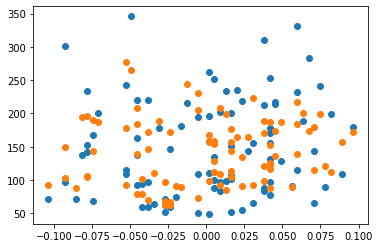

In [55]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [12]:
# 필요없는 칼럼 확인
pd.concat([df_X,df_y],axis=1).corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [43]:
# print(df_X.drop(labels='sex',axis=1))
X = df_X.drop(labels='sex',axis=1).values   #필요없는 sex 칼럼 삭제 및 X 재지정
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)   #학습/테스트셋 다시 만들기

# 가중치 및 모델함수 재지정
W = np.random.rand(9)
b = np.random.rand()
# 모델함수
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [44]:
losses = []
# 재학습
for i in range(1, 8001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 80 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 80 : Loss 5468.7369
Iteration 160 : Loss 5012.7467
Iteration 240 : Loss 4657.4376
Iteration 320 : Loss 4378.9162
Iteration 400 : Loss 4159.1142
Iteration 480 : Loss 3984.3535
Iteration 560 : Loss 3844.2665
Iteration 640 : Loss 3730.9827
Iteration 720 : Loss 3638.5167
Iteration 800 : Loss 3562.3069
Iteration 880 : Loss 3498.8686
Iteration 960 : Loss 3445.5319
Iteration 1040 : Loss 3400.2442
Iteration 1120 : Loss 3361.4217
Iteration 1200 : Loss 3327.8367
Iteration 1280 : Loss 3298.5328
Iteration 1360 : Loss 3272.7609
Iteration 1440 : Loss 3249.9302
Iteration 1520 : Loss 3229.5720
Iteration 1600 : Loss 3211.3114
Iteration 1680 : Loss 3194.8461
Iteration 1760 : Loss 3179.9305
Iteration 1840 : Loss 3166.3629
Iteration 1920 : Loss 3153.9768
Iteration 2000 : Loss 3142.6329
Iteration 2080 : Loss 3132.2139
Iteration 2160 : Loss 3122.6203
Iteration 2240 : Loss 3113.7666
Iteration 2320 : Loss 3105.5794
Iteration 2400 : Loss 3097.9945
Iteration 2480 : Loss 3090.9559
Iteration 2560 : Loss

In [45]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3012.0985609494855

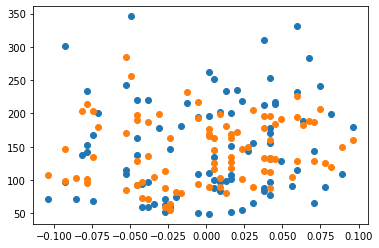

In [35]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()